# Изучение закономерностей, определяющих успешность игр

## Описание проекта

Мы предстаем работником в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

## Цель проекта
Нам необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Задача проекта
Подготовить и проанализировать предоставленные данные, после проверить необходимые гипотезы и сделать выводы на их основании.


## План проекта

- Выполним __предобработку данных:__
  - Заменим названия столбцов (приведем к нижнему регистру);
  - Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;
  - Обработаем пропуски при необходимости:
  - Поясним, почему заполнили пропуски определённым образом или почему не стали это делать;
  - Опишем возможные причины, которые могли привести к пропускам;
 - Аббревиатуру 'tbd' в столбце с оценкой пользователей отдельно разберем это значение и опишем, как его обработать;
  - __Посчитаем__ суммарные продажи во всех регионах и запишите их в отдельный столбец.

- Проведем __исследовательский анализ__ данных:
  - Проверим, сколько игр выпускалось в разные годы. определим, важны ли данные за все периоды?
  - Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и постройте распределение по годам. 
  - Определим, за какой характерный срок появляются новые и исчезают старые платформы?
  - Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. _Основной фактор — эти данные помогут построить прогноз на 2017 год. Без учета в работе данных за предыдущие годы._
  - Определим, какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
  - Простроим график Boxplot по глобальным продажам игр в разбивке по платформам. опишем результат.
  - Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
  - Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
  - Соотнесем выводы с продажами игр на других платформах.
Посмотрите на общее распределение игр по жанрам. Определим, что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

- __Составим__ портрет пользователя каждого региона:
  - Определим для пользователя каждого региона (NA, EU, JP:
    - Самые популярные платформы (топ-5). Опишем различия в долях продаж.
    - Самые популярные жанры (топ-5). Поясните разницу.
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

- __Проверим гипотезы__
  - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
  - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
  - Зададим самостоятельно пороговое значение alpha.
  - Поясним:
    - Как мы сформулировали нулевую и альтернативную гипотезы;
    - Какой критерий применили для проверки гипотез и почему.

## Описание данных

`Name` — название игры  
`Platform` — платформа  
`Year_of_Release` — год выпуска  
`Genre` — жанр игры  
`NA_sales` — продажи в Северной Америке (миллионы проданных копий)  
`EU_sales` — продажи в Европе (миллионы проданных копий)  
`JP_sales` — продажи в Японии (миллионы проданных копий)  
`Other_sales` — продажи в других странах (миллионы проданных копий).  
`Critic_Score` — оценка критиков (максимум 100)  
`User_Score` — оценка пользователей (максимум 10)  
`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  
Данные за 2016 год могут быть неполными.

## Тело проекта
### Настроим необходимое в работе окружение:

In [1]:
import pandas as pd # Импортируем библиотеку pandas для работы с таблицами
import numpy as np # для работы с массивами данных
from scipy import stats as st # для работы со статистикой
import matplotlib.pyplot as plt # Для работы с визуализацией данных 
import seaborn as sns
import warnings # Отключим предупреждения платформы
warnings.simplefilter('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5 # Сразу установим увеличенный дефолтный размер графиков
from functools import reduce #для корректного объединения таблиц

### Изучение данных из файла
Выполним корректное открытие всех датасетов представленных нам для работы:


In [2]:
pd.set_option('display.max_columns', 50) # настроим корректный вывод датасета
try:
  games = pd.read_csv('/work/games.csv')  # откроем датасет
except:
  games = pd.read_csv('/datasets/games.csv')  # откроем датасет

In [37]:
# выведем датасет для первичного ознакомления
print('таблица games.csv')
games.head()

таблица games.csv


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1,RP,31.38


In [38]:
print('Характеристики таблицы games') # а также ознакомимся с основными его характеристиками
games.info()

Характеристики таблицы games
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  object 
 10  rating           16715 non-null  object 
 11  sum_sales        16715 non-null  float64
dtypes: Int64(1), float64(6), object(5)
memory usage: 1.5+ MB


### Предобработка данных

#### Замена названий столбцов

Приведем названия всех столбцов к нижнему регистру


In [5]:
games.columns = games.columns.str.lower()
games.head(1) # проверим, все ли корректно исправилось

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


#### Изменение типов данных

Приступая к изменению типов данных перечислим столбцы в которых необходимо будет произвести замену:

- столбец 'year_of_release': в тип данных int
- __столбец 'user_score': в тип данных float__ преобразовать невозможно, так как у нас присутствуют данные `"tbd" - to be determined(данные еще не определены и будут объявлены позже)`

**Выполним все эти преобразования для корректной дальнейшей работы с данными столбцами**


In [6]:
games['year_of_release'] = games['year_of_release'].astype('Int64')

#### Пропущенные значения

Проверим, где у нас есть пропущенные значения и их количество:

In [7]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Как видно из кода выше нас будут интересовать столбцы:
- 'name': удалим строки с пропущенными значениями, так как потеря данных совставит сотые процента.
- 'year_of_release': __заполнять не будем__, т.к. нули будут некорректным заполнением, как и любое другое значение. Однако будем иметь это ввиду при дальнейшем анализе
- 'genre': также удалим строки с пропущенными значениями, так как потеря данных совставит сотые процента.
- 'critic_score': данные значения __заменим__ значениями -1 для дальнейшего фильтра, так как при удалении будет потеряно слишком много данных, заменять нулями будет некорректно, т.к. может повлиять на статистику (где-то еще может быть 0), в дальнейших исследованиях будем применять фильтр по этим значениям. 
- 'user_score': __аналогично__ столбцу 'critic_score'
- 'rating': заполним пропуски значением __"rp"__ (RP - Rating Pending) т.е. ожидает оценки.

In [8]:
games['name'] = games['name'].dropna()
games['genre'] = games['genre'].dropna()
games['rating'] = games['rating'].fillna(value='RP')
games['critic_score'] = games['critic_score'].fillna(value=-1)
games['user_score'] = games['user_score'].fillna(value=-1)
games.isna().sum() # проверим, ничего ли не пропустили.

name                 2
platform             0
year_of_release    269
genre                2
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
dtype: int64

#### Расчеты суммарных продаж во всех регионах 

Интересующие нас данные хранятся в столбцах:   
- 'na_sales',
- 'eu_sales',	
- 'jp_sales',	
- 'other_sales'

Просуммируем их и запишем в новый столбец 'sum_sales'

In [9]:
games['sum_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1) # простейшее сложение
games.head(5) # проверка

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1,RP,31.38


#### Вывод по предобработке данных

Данные были полностью предобработаны и подготовлены к анализу. Было выполнено:
- Замена названий всех столбцов на нижний регистр
- Изменение типов данных в столбце: столбец 'year_of_release': в тип данных int (столбец user_score заменили тип при фильтрации в конкретных случаях исследования)
- Обнаружены и убраны пропущенные значения в столбцах:
  - 'name', 'genre', 'critic_score', 'user_score', 'rating'
- Произведен поиск дополнительных ошибок в данных, однако в связи с отсутствием результата был удален из иследования.
- Выполнен расчет суммарных продаж во всех регионах и добавлен в таблицу

### Исследовательский анализ данных

#### Количество выпущенных игр в разные года

Применим метод `pivot_table` и посчитаем данные

In [10]:
sum_games = games.pivot_table(index='year_of_release', values='name', aggfunc='count',)
sum_games.columns = ['games_count']
sum_games.head()

,games_count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14


#### Важны ли данные за весь период? 

В данном исследовании нам потребуется усеченный набор данных, так как к 2016 году платформы изменились и некоторые игры утеряли свою актуальность. Однако на данном этапе мы оставим все данные и применим фильтрацию только после рассмотрения следующих вопросов. Для большей ясности обратимся к визуализации.

In [11]:
games['platform'].unique() #выберем платформы случайным образом для визуализации

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

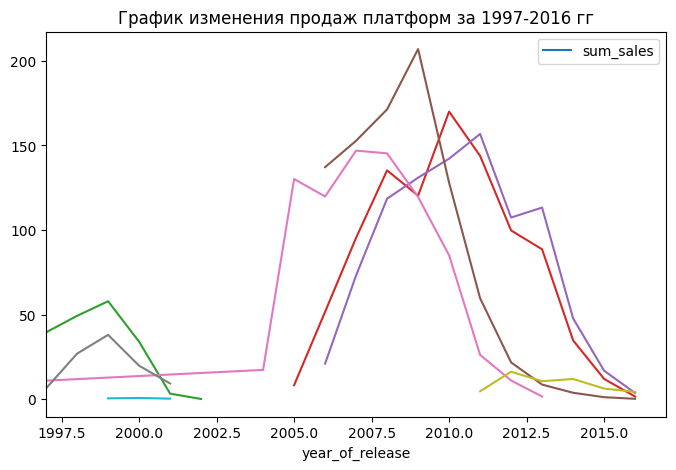

In [12]:
platforms_by_year = games.pivot_table(index=['platform', 'year_of_release'], values='sum_sales', aggfunc='sum')
platforms_to_show = ['PCFX', 'NES', 'N64', 'X360', 'PS3', 'Wii', 'DS', 'GB', 'PSV', 'WS']
for i in platforms_to_show :
    platforms_by_year.query('platform == @i').groupby('year_of_release')['sum_sales'].sum().plot()
    plt.legend(platforms_by_year)
    plt.xlim(1997,2017)
    plt.title('График изменения продаж платформ за 1997-2016 гг')

Как видно из графика, продажи на платформах N64, WS, GB пропадают полностью к 2002 году, а платформа Wii только начинает свой путь с 2005 года. Данный график говорит нам о том, что брать весь набор данных за весь период нецелесообразно в рамках исследования 2017 года.

#### Продажи по платформам
Оценим, как менялись продажи по платформам, для этого сгруппируем продажи по каждой платформе по годам и посмотрим на суммарное количество проданных игр для этих платформ, сформируем топ-5, после чего построим распределение по годам.


In [13]:
platform_sales = games.pivot_table(index=['platform', 'year_of_release'], values='sum_sales', aggfunc='sum')
display(platform_sales.reset_index().head()) # таблица с распределением продаж по годам для каждой платформы

platform_sales_sum = platform_sales.pivot_table(index='platform', values='sum_sales', aggfunc='sum').reset_index()
display(platform_sales_sum.sort_values(by='sum_sales', ascending=False).head())
#таблица для определения топ-5 платформ с наибольшими сумм продажами

,platform,year_of_release,sum_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27


,platform,sum_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78


Итак, __ТОП-5__ сформирован: Построим распределение для платформ: PS2, X360, PS3, Wii и DS

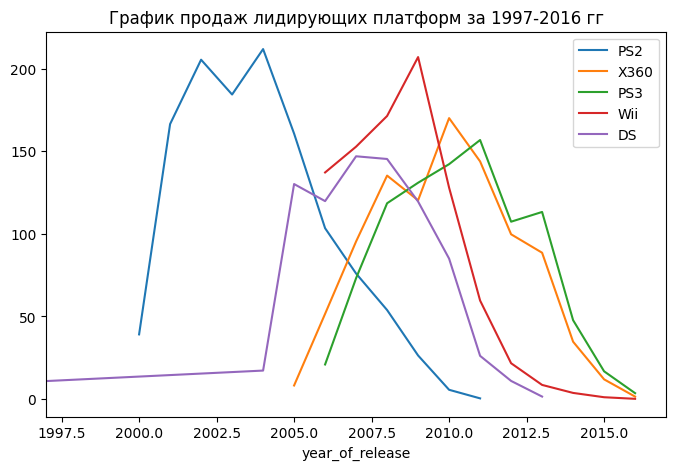

In [14]:
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
for i in platforms :
    platform_sales.query('platform == @i').groupby('year_of_release')['sum_sales'].sum().plot()
    plt.legend(platforms)
    plt.xlim(1997,2017)
    plt.title('График продаж лидирующих платформ за 1997-2016 гг')

Исходя из графика, видно:
- Полный цикл жизни платформы, от начала роста до сильного падения равен порядка 5 лет

#### Актуальный период

Исходя из графика, так же видно:
- Цикл активности платформы, от возрастания продаж до начала падения, равен порядка 3 лет, эту цифру и будем считать актуальным периодом в дальнейшем

#### Отсечение данных за прошлый период

Так как актуальным периодом нами был признан срок в 3 года, мы будем работать с данными 2013-2016 год. Отсечем все данные из датасета ранее 2013 года. С этими данными и будем работать далее.

In [15]:
games_relevant = games[games['year_of_release'] >= 2013]
games_relevant.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1,RP,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1,RP,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


#### Выбор потенциально прибыльных платформ

Для ответа на вопрос: "Какие платформы лидируют по продажам, растут или падают?" для актуального периода - сведем данные за актуальный период по платформам и выявим лидеров по продажам.

In [16]:
platform_sales_relevant = games_relevant.pivot_table(index=['platform', 'year_of_release'], values='sum_sales', aggfunc='sum')
platform_sales_relevant = platform_sales_relevant.reset_index()
display(platform_sales_relevant.head())

platform_sales_relevant_sum = platform_sales_relevant.pivot_table(index='platform', values='sum_sales', aggfunc='sum').reset_index()
display(platform_sales_relevant_sum.sort_values(by='sum_sales', ascending=False).head())


,platform,year_of_release,sum_sales
0,3DS,2013,56.57
1,3DS,2014,43.76
2,3DS,2015,27.78
3,3DS,2016,15.14
4,DS,2013,1.54


,platform,sum_sales
4,PS4,314.14
3,PS3,181.43
10,XOne,159.32
0,3DS,143.25
9,X360,136.80


После построим графики по лидирующим платформам (PS4,PS3,XOne,3DS,X360) и определим где они находятся на 2016 год:

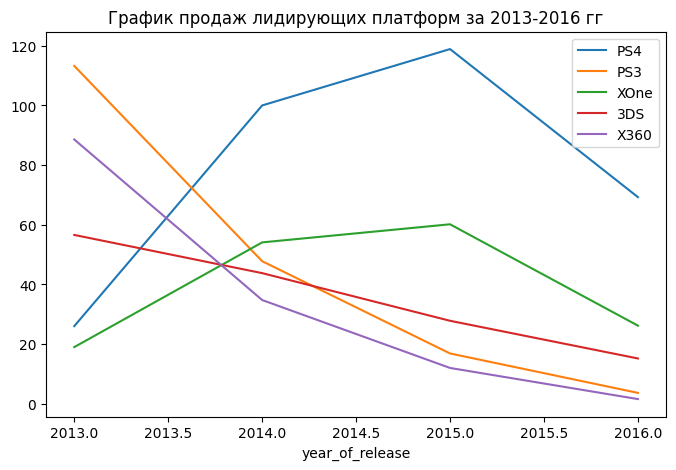

In [17]:
platforms_relevant = ['PS4', 'PS3', 'XOne', '3DS', 'X360']
for i in platforms_relevant :
    platform_sales_relevant.query('platform == @i').groupby('year_of_release')['sum_sales'].sum().plot()
    plt.legend(platforms_relevant)
    plt.title('График продаж лидирующих платформ за 2013-2016 гг')

Из графика видно, что все платформы ТОП-списка на 2016 находятся на стадии падения, однако, вернувшись к графику распределения ТОП-списка за весь период мы видимо что после "первого падения" графика, в большей части случаев идет рост на следующий год. Сделаем вывод по платформам:
- PS4 появилась недавно, падение первое, ожидаем рост в следующем году
- PS3 является предыдущей моделью вышеуказанной платформы, что подтверждает её наиболее вероятную убыточность в следующем году
- XOne - ситуация аналогична PS4, данная модель недавно вышла на рынок, ожидаем рост в следующем году
- 3DS - данная платформа является обновлением платформы DS и по графику видно, что падение является первым, следовательно ожидаем рост в следующем году
- X360 является прошлой моделью XOne и логично идет на спад

__Итого: Потенциально прибыльные платформы в 2017 году - PS4, XOne, 3DS__

#### Глобальные продажи игр в разбивке по платформам

Построим Boxplot-ы для глобальных продаж игр в разбивке по топ-платформам и опишем результаты

Оценим медианы/средние, максимальные и минимальные значения для каждой платформы
Медианные значения платформ: platform
3DS     35.770
PS3     32.290
PS4     84.625
X360    23.350
XOne    40.110
Name: sum_sales, dtype: float64
Средние значения платформ: platform
3DS     35.8125
PS3     45.3575
PS4     78.5350
X360    34.2000
XOne    39.8300
Name: sum_sales, dtype: float64
Максимальные значения для каждой платформы: platform
3DS      56.57
PS3     113.25
PS4     118.90
X360     88.58
XOne     60.14
Name: sum_sales, dtype: float64
Минимальные значения для каждой платформы: platform
3DS     15.14
PS3      3.60
PS4     25.99
X360     1.52
XOne    18.96
Name: sum_sales, dtype: float64


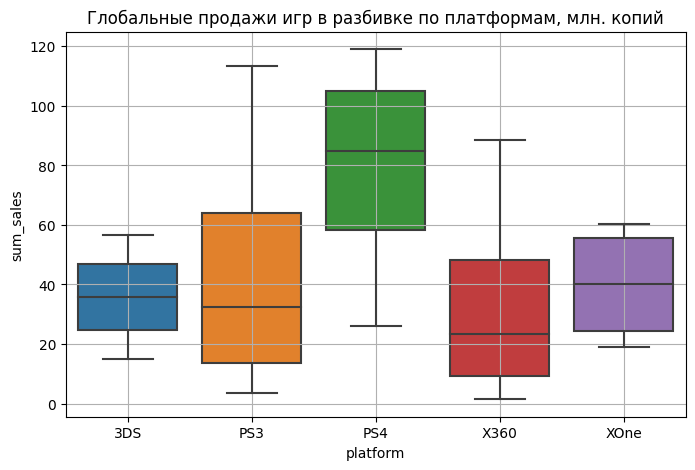

In [18]:
platform_sales_relevant_top5 = platform_sales_relevant.query('platform in @platforms_relevant')
sns.boxplot(data=platform_sales_relevant_top5, y ='sum_sales', x='platform').set_title('Глобальные продажи игр в разбивке по платформам, млн. копий')
plt.grid()
plt.show
print('Оценим медианы/средние, максимальные и минимальные значения для каждой платформы')
print(f"Медианные значения платформ: {platform_sales_relevant_top5.groupby('platform')['sum_sales'].median()}")
print(f"Средние значения платформ: {platform_sales_relevant_top5.groupby('platform')['sum_sales'].mean()}")
print(f"Максимальные значения для каждой платформы: {platform_sales_relevant_top5.groupby('platform')['sum_sales'].max()}")
print(f"Минимальные значения для каждой платформы: {platform_sales_relevant_top5.groupby('platform')['sum_sales'].min()}")


#### Опишем распределение для каждой платформы: 
(Оценим медианы продаж, минимальные и максимальные значения, так как выбросов в данных мы не нашли) 
- 3DS:
  - Медиана продаж находится на 36 млн. копий 
  - Среднее значение продаж находится на 36 млн. копий
  - Максимальное значение порядка 56 млн. копий
  - Минимальное значение порядка 15 млн. копий
- PS3:
  - Медиана продаж находится на 32 млн. копий 
  - Среднее значение продаж находится на 45  млн. копий
  - Максимальное значение порядка 113 млн. копий
  - Минимальное значение порядка 3 млн. копий
- PS4:
  - Медиана продаж находится на 85 млн. копий 
  - Среднее значение продаж находится на 78 млн. копий
  - Максимальное значение порядка 119 млн. копий
  - Минимальное значение порядка 26 млн. копий
- X360:
  - Медиана продаж находится на 23 млн. копий 
  - Среднее значение продаж находится на 34 млн. копий
  - Максимальное значение порядка 89 млн. копий
  - Минимальное значение порядка 2 млн. копий
- XOne:
  - Медиана продаж находится на 40 млн. копий 
  - Среднее значение продаж находится на 40 млн. копий
  - Максимальное значение порядка 60 млн. копий
  - Минимальное значение порядка 19 млн. копий      

Наблюдения подтверждают прогноз лидеров на 2017 год

#### Влияние на продажи внутри одной популярной платформы отзывы пользователей и критиков

Рассмотрим данный вопрос на примере одной из популярных платформ за актуальный период, возьмем PS4
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами, а после опишем результат.

<AxesSubplot: title={'center': 'Зависимость между оценками критиков и продажами по PS4'}, xlabel='critic_score', ylabel='sum_sales'>

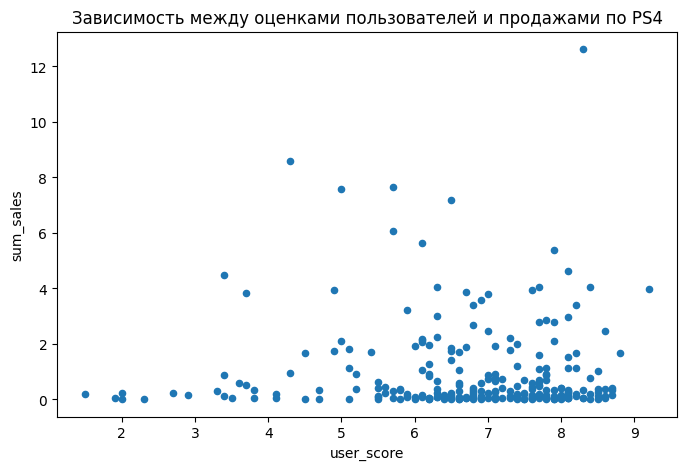

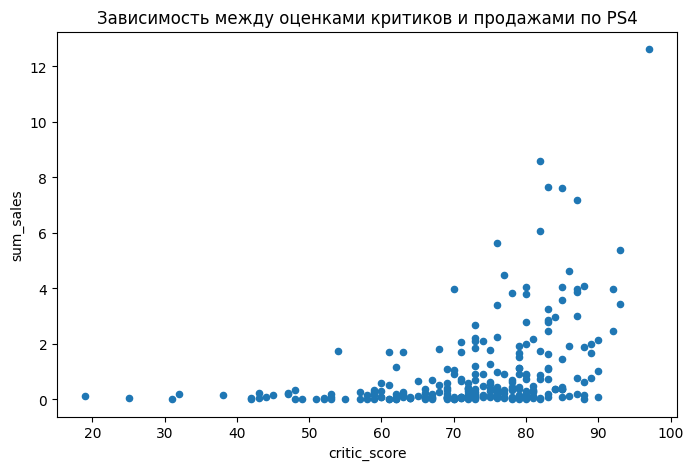

In [19]:
platform_ps4 = games_relevant.query('platform == "PS4"')
platform_ps4 = platform_ps4.query('user_score != "tbd"') #уберем значения группы TBD из исследования так как они могут быть какими угодно 
platform_ps4['user_score'] = platform_ps4['user_score'].astype('float') #применим для данного исследования, так как без этого не работает корреляция и фильтр
platform_ps4 = platform_ps4.query('user_score > 0 and critic_score > 0')
platform_ps4.plot(x='user_score', y='sum_sales', kind='scatter', title='Зависимость между оценками пользователей и продажами по PS4')
platform_ps4.plot(x='critic_score', y='sum_sales', kind='scatter', title='Зависимость между оценками критиков и продажами по PS4')

In [20]:
platform_ps4[['critic_score', 'user_score', 'sum_sales']].corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.557654,0.405895
user_score,0.557654,1.000000,-0.033625
sum_sales,0.405895,-0.033625,1.000000


__Корреляция между оценками пользователей и продажами__ практически отсутвует и тем самым наводит нас на вывод, что высокие оценки пользователей далеко не всегда будут означать хорошие продажи, ровно как и наоборот.  
__Корреляция между оценками критиков и продажами__ прослеживается, хоть и слабо, выходит что высокие оценки хорошо влияют на продажи, но так бывает не всегда.

#### Влияние на продажи внутри других платформ отзывов пользователей и критиков

Для сравнения возьмем 4 менее популярные платформы из списка `platforms_relevant` и применим к ним такие же исследования а после сравним выводы. 

<AxesSubplot: title={'center': 'Зависимость между оценками критиков и продажами по другим платформам из ТОП-5'}, xlabel='critic_score', ylabel='sum_sales'>

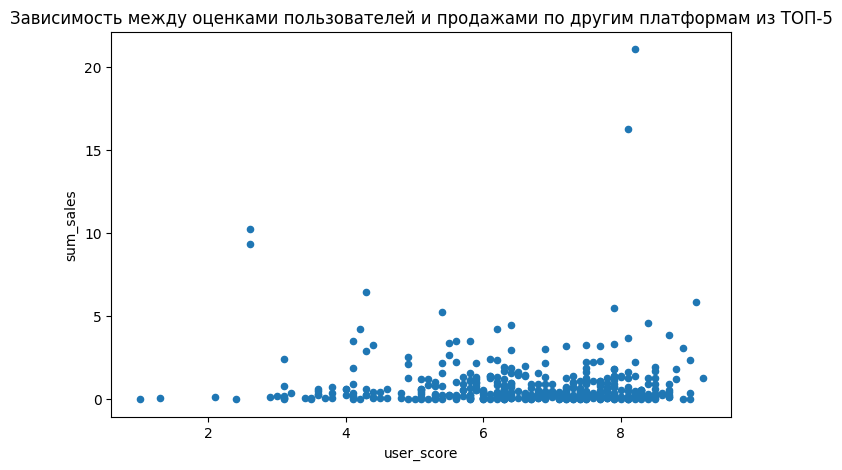

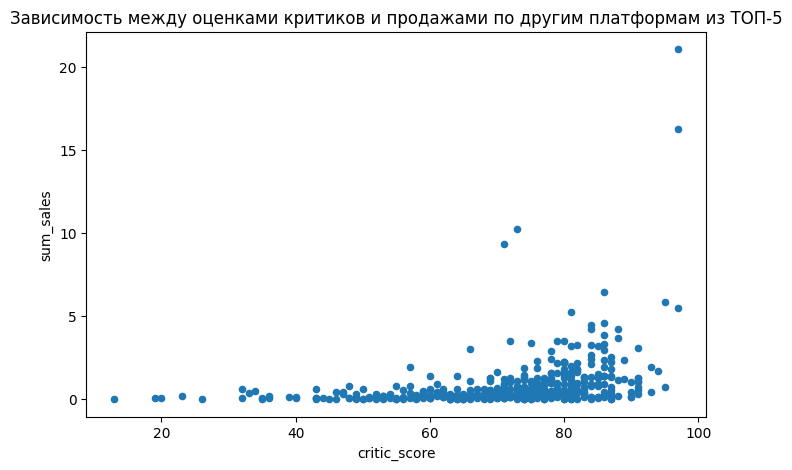

In [21]:
platforms_relevant = ['PS3', 'XOne', '3DS', 'X360'] #перезапи
platform_top5 = games_relevant.query('platform in @platforms_relevant and critic_score > 0')
platform_top5 = platform_top5.query('user_score != "tbd"')
platform_top5['user_score'] = platform_top5['user_score'].astype('float')
platform_top5 = platform_top5.query('user_score > 0')
platform_top5.plot(x='user_score', y='sum_sales', kind='scatter', title='Зависимость между оценками пользователей и продажами по другим платформам из ТОП-5')
platform_top5.plot(x='critic_score', y='sum_sales', kind='scatter', title='Зависимость между оценками критиков и продажами по другим платформам из ТОП-5')

In [34]:
top5_corr = platform_top5.pivot_table(index='platform', values=['critic_score', 'user_score', 'sum_sales'], aggfunc='corr').reset_index()
top5_corr.head()

,platform,level_1,critic_score,sum_sales,user_score
0,3DS,critic_score,1.000000,0.339235,0.769536
1,3DS,user_score,0.769536,0.272990,1.000000
2,3DS,sum_sales,0.339235,1.000000,0.272990
3,PS3,critic_score,1.000000,0.333807,0.599920
4,PS3,user_score,0.599920,0.022691,1.000000


In [23]:
platform_ps4[['critic_score', 'user_score', 'sum_sales']].corr() # выведем еще раз для сравнения

,critic_score,user_score,sum_sales
critic_score,1.000000,0.557654,0.405895
user_score,0.557654,1.000000,-0.033625
sum_sales,0.405895,-0.033625,1.000000


При сравенении двух таблиц можно сделать вывод,что корреляция практически не отличается среди двух таблиц. Выводы повторяются, исследование по одной из популярных платформ можно считать корректным.

#### Общее распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам, ответим на вопросы:
- Что можно сказать о самых прибыльных жанрах? 
- Выделяются ли жанры с высокими и низкими продажами?

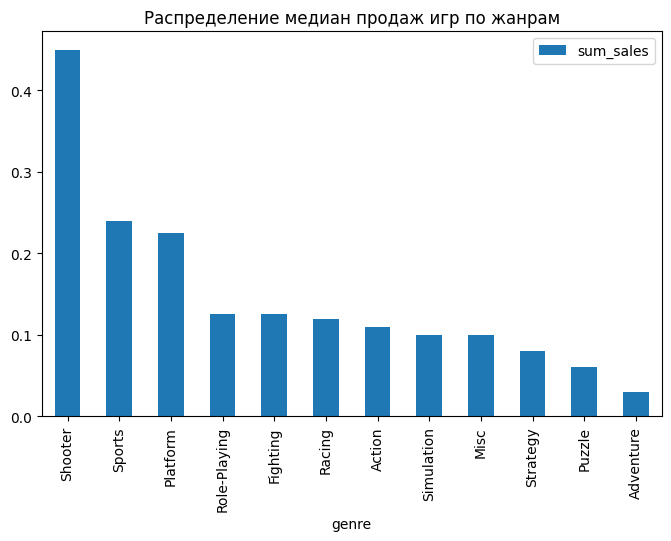

In [36]:
# сравним медианы продаж внутри каждого жанра для поиска наиболее доходного жанра
genres_profit = games_relevant.pivot_table(index='genre', values='sum_sales', aggfunc='median').reset_index()
genres_profit = genres_profit.sort_values(by='sum_sales', ascending=False)
genres_profit.plot(x='genre', y='sum_sales', kind='bar', title='Распределение медиан продаж игр по жанрам')
plt.show()

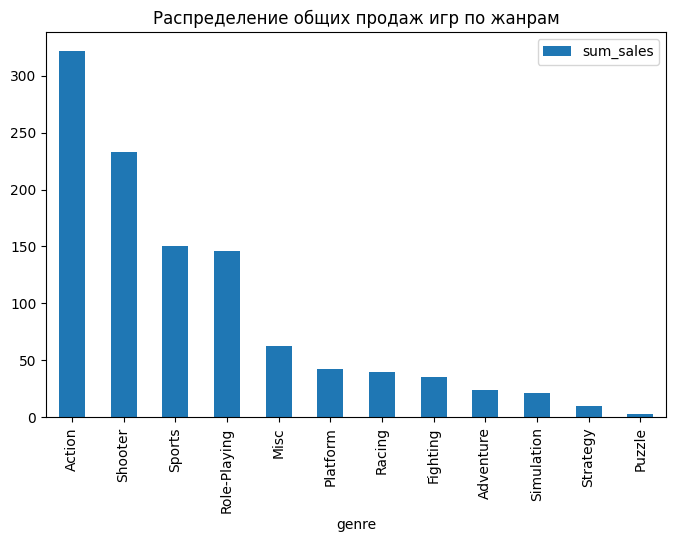

In [35]:
# сравним общие продажи по жанрам для поиска жанров с самым высоким количеством продаж
genres_agg = games_relevant.pivot_table(index='genre', values='sum_sales', aggfunc='sum').reset_index()
genres_agg = genres_agg.sort_values(by='sum_sales', ascending=False)
genres_agg.plot(x='genre', y='sum_sales', kind='bar', title='Распределение общих продаж игр по жанрам')
plt.show()

### Ответы на вопросы:

Объединим ответы на вопросы по данному разделу в общем выводе:
- __Самые прибыльные жанры__ это Shooter и Sports, они имеют самые высокие медианы продаж
- __Самые популярные жанры__ это Action и Shooter, продаж по ним больше всего
- __Самые низкие продажи__ у жанров Strategy и Puzzle, они являются самыми менее популярными жанрами игр. 


#### Вывод по исследовательскому анализу

- Было выполнено:
  - Расчет количетства выпущенных игр в разные года
    - Определена важность всего периода
  - Расчет продаж по платформам - сформировали ТОП-5: PS2, X360, PS3, Wii и DS
  - Расчет актуального периода - 2013-2016
  - Отсечение данных за прошлый период
  - Выбор потенциально прибыльных платформ - PS4, XOne, 3DS
  - Подтвердили прогноз на 2017 рассмотрев глобальные продажи игр в разбивке по платформам
  - Рассмотрели влияние на продажи внутри платформ отзывов критиков и пользователей - __Корреляция между оценками пользователей и продажами__ практически отсутвует и тем самым наводит нас на вывод, что высокие оценки пользователей далеко не всегда будут означать хорошие продажи, ровно как и наоборот.  
__Корреляция между оценками критиков и продажами__ прослеживается, хоть и слабо, выходит что высокие оценки хорошо влияют на продажи, но так бывает не всегда.
  - Определели самые прибыльные жанры, они же самые популярные это Action и Shooter, продаж по ним больше всего
  - Определили самые низкие продажи у жанров Strategy и Puzzle, они являются самыми менее популярными жанрами игр. 


### Портрет пользователей каждого региона

В данном разделе определим для пользователей каждого региона (NA, EU, JP) за весь период в нашем датасете:
- Самые популярные платформы (топ-5). Опишем различия в долях продаж.
- Самые популярные жанры (топ-5). Поясним разницу.
И определим: 
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?


#### Самые популярные платформы по регионам

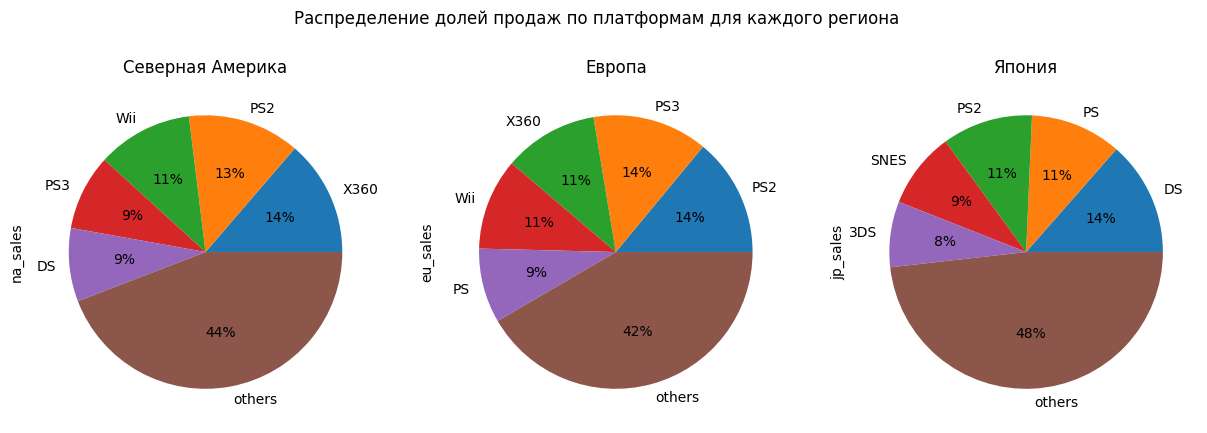

In [26]:
# Определим ТОП-5 по платформам
na_top5_platform = games.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).reset_index().head(5)
eu_top5_platform = games.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).reset_index().head(5)
jp_top5_platform = games.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).reset_index().head(5)
# Определим значение "другие"
na_others_platform = pd.DataFrame(data = {'platform' : ['others'], 'na_sales' : (games['na_sales'].sum()-na_top5_platform['na_sales'].sum()).sum()})
eu_others_platform = pd.DataFrame(data = {'platform' : ['others'], 'eu_sales' : (games['eu_sales'].sum()-eu_top5_platform['eu_sales'].sum()).sum()})
jp_others_platform = pd.DataFrame(data = {'platform' : ['others'], 'jp_sales' : (games['jp_sales'].sum()-jp_top5_platform['jp_sales'].sum()).sum()})
# Сопоставим таблицы
na_top5_platform = pd.concat([na_top5_platform, na_others_platform])
eu_top5_platform = pd.concat([eu_top5_platform, eu_others_platform])
jp_top5_platform = pd.concat([jp_top5_platform, jp_others_platform])

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
fig.suptitle('Распределение долей продаж по платформам для каждого региона')
na_top5_platform.plot(kind = 'pie', y = 'na_sales', labels = na_top5_platform['platform'], legend=False, autopct='%1.0f%%', ax = axes[0])
eu_top5_platform.plot(kind = 'pie', y = 'eu_sales', labels = eu_top5_platform['platform'], legend=False, autopct='%1.0f%%', ax = axes[1])
jp_top5_platform.plot(kind = 'pie', y = 'jp_sales', labels = jp_top5_platform['platform'], legend=False, autopct='%1.0f%%', ax = axes[2])
axes[0].set_title('Северная Америка')
axes[1].set_title('Европа')
axes[2].set_title('Япония')
plt.show()

Доли по регионам распределились следующим образом:
- В Северной Америке:
  - Определен ТОП-5 платформ: X360: 14%, PS2: 13%, Wii: 11%, PS3: 9%, DS: 9%. Остальные 44% распределились по другим платформам 
  - Самая популярная платформа в Северной Америке - X360

- В Европе:
  - Определен ТОП-5 платформ: PS2: 14%, PS3: 14%, X360: 11%, Wii: 11%, PS: 9%. Остальные 42 распределились по другим платформам 
  - Самая популярная платформа в Европе - PS3 и PS2

- В Японии:
  - Определен ТОП-5 платформ: DS: 14%, PS: 11%, PS2: 11%, SNES: 9%, 3DS: 48%. Остальные 42 распределились по другим платформам 
  - Самая популярная платформа в Японии - DS

Выводы:

В Европе нормальное распределение долей на 2016 год, платформы SONY(PS,PS2,PS3) заняли места так, что становится очевидно по графику, что PS3 набирает популярность и занимает первое место на рынке вместо PS2, а PS является уходящей, хотя тоже очень популярной моделью, её продажи идут на спад, В Северной Америке же, обновление платформ идет с задержкой, в связи с чем, такая разница в долях рынка и также более распространенны платформы Nintendo (DS и Wii). В Японии нормально распределились и преобладают платформы компании Nintendo и Sony

#### Самые популярные жанры по регионам

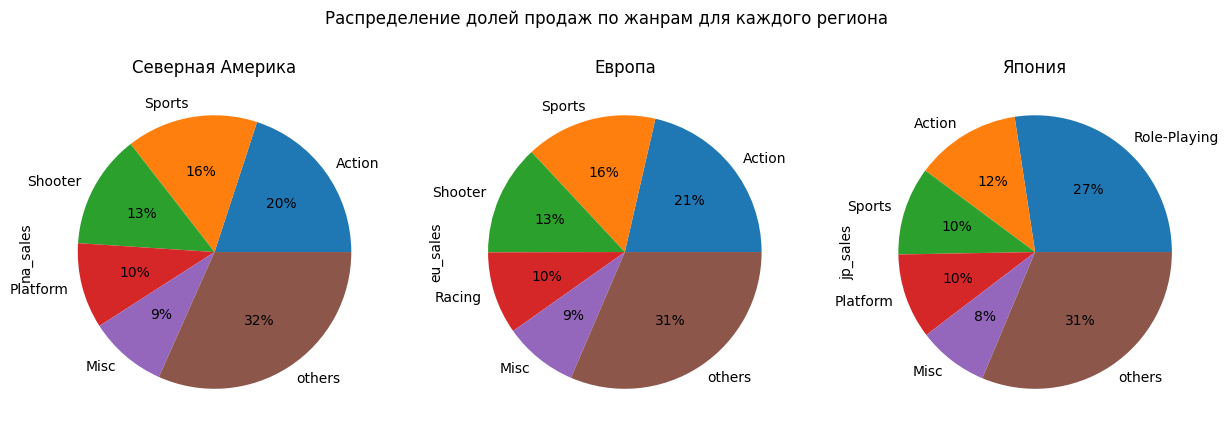

In [27]:
# Определим ТОП-5 по жанрам
na_top5_genre = games.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).reset_index().head(5)
eu_top5_genre = games.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).reset_index().head(5)
jp_top5_genre = games.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).reset_index().head(5)
# Определим значение "другие"
na_others_genre = pd.DataFrame(data = {'genre' : ['others'], 'na_sales' : (games['na_sales'].sum()-na_top5_genre['na_sales'].sum()).sum()})
eu_others_genre = pd.DataFrame(data = {'genre' : ['others'], 'eu_sales' : (games['eu_sales'].sum()-eu_top5_genre['eu_sales'].sum()).sum()})
jp_others_genre = pd.DataFrame(data = {'genre' : ['others'], 'jp_sales' : (games['jp_sales'].sum()-jp_top5_genre['jp_sales'].sum()).sum()})
# Сопоставим таблицы
na_top5_genre = pd.concat([na_top5_genre, na_others_genre])
eu_top5_genre = pd.concat([eu_top5_genre, eu_others_genre])
jp_top5_genre = pd.concat([jp_top5_genre, jp_others_genre])

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
fig.suptitle('Распределение долей продаж по жанрам для каждого региона')
na_top5_genre.plot(kind = 'pie', y = 'na_sales', labels = na_top5_genre['genre'], legend=False, autopct='%1.0f%%', ax = axes[0])
eu_top5_genre.plot(kind = 'pie', y = 'eu_sales', labels = eu_top5_genre['genre'], legend=False, autopct='%1.0f%%', ax = axes[1])
jp_top5_genre.plot(kind = 'pie', y = 'jp_sales', labels = jp_top5_genre['genre'], legend=False, autopct='%1.0f%%', ax = axes[2])
axes[0].set_title('Северная Америка')
axes[1].set_title('Европа')
axes[2].set_title('Япония')
plt.show()

Доли по регионам распределились следующим образом:
- В Северной Америке:
  - Определен ТОП-5 жанров: Action: 20%, Sports: 16%, Shooter: 13%, Platform: 10%, Misc: 9%. Остальные 32% распределились по другим платформам 
  - Самый популярный жанр в Северной Америке - Action

- В Европе:
  - Определен ТОП-5 жанров: Action: 20%, Sports: 16%, Shooter: 13%, Racing: 10%, Misc: 9%. Остальные 31% распределились по другим платформам 
  - Самый популярный жанр в Европе - Action

- В Японии:
  - Определен ТОП-5 жанров: Role-Playing: 27%, Action: 12%, Sports: 10%, Platform: 10%, Misc: 8%. Остальные 31% распределились по другим платформам 
  - Самый популярный жанр в Японии - Role-Playing

Выводы:

Картина для Северной Америки и Европы практически одинаковая, однако место жанра платформеров в Северной Америке, в Европе занял жанр - гонки, для Японии же ситуация совершенно другая, и жанр ролевых игр, который даже не попал в ТОП-5 в других регионах, занял лидирующую позицию, в остальном же, распределение очень похоже на Северную америку, если сдвинуть каждого члена ТОП-5 на одну позицию вниз

#### Рейтинг ESRB и продажи в отдельном регионе

In [28]:
games['rating'].value_counts() #для быстрой визуальной оценки

RP      6769
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
AO         1
Name: rating, dtype: int64

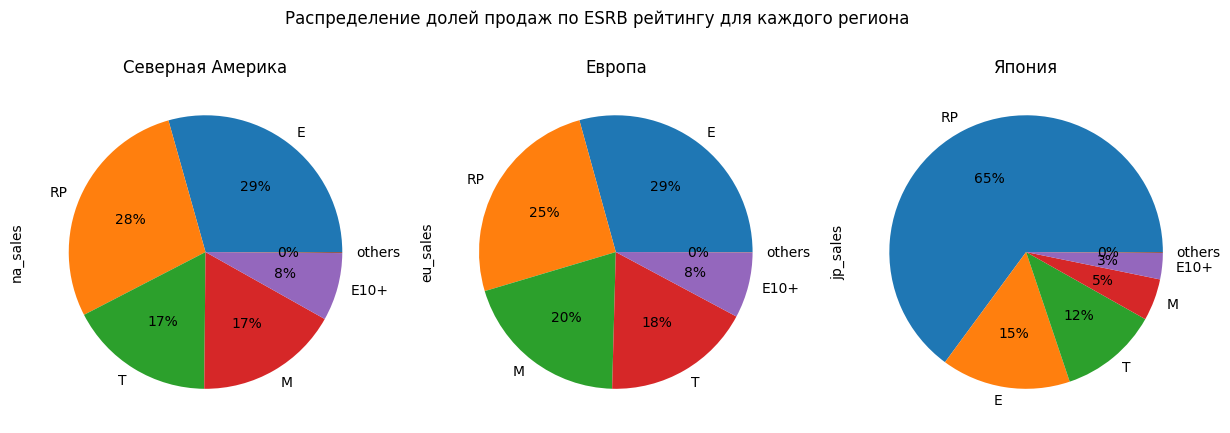

In [29]:
# Определим ТОП-5 по ESRB рейтингу
na_top5_esrb = games.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).reset_index().head(5)
eu_top5_esrb = games.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).reset_index().head(5)
jp_top5_esrb = games.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).reset_index().head(5)
# Определим значение "другие"
na_others_esrb = pd.DataFrame(data = {'rating' : ['others'], 'na_sales' : (games['na_sales'].sum()-na_top5_esrb['na_sales'].sum()).sum()})
eu_others_esrb = pd.DataFrame(data = {'rating' : ['others'], 'eu_sales' : (games['eu_sales'].sum()-eu_top5_esrb['eu_sales'].sum()).sum()})
jp_others_esrb = pd.DataFrame(data = {'rating' : ['others'], 'jp_sales' : (games['jp_sales'].sum()-jp_top5_esrb['jp_sales'].sum()).sum()})
# Сопоставим таблицы
na_top5_esrb = pd.concat([na_top5_esrb, na_others_esrb])
eu_top5_esrb = pd.concat([eu_top5_esrb, eu_others_esrb])
jp_top5_esrb = pd.concat([jp_top5_esrb, jp_others_esrb])

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
fig.suptitle('Распределение долей продаж по ESRB рейтингу для каждого региона')
na_top5_esrb.plot(kind = 'pie', y = 'na_sales', labels = na_top5_esrb['rating'], legend=False, autopct='%1.0f%%', ax = axes[0])
eu_top5_esrb.plot(kind = 'pie', y = 'eu_sales', labels = eu_top5_esrb['rating'], legend=False, autopct='%1.0f%%', ax = axes[1])
jp_top5_esrb.plot(kind = 'pie', y = 'jp_sales', labels = jp_top5_esrb['rating'], legend=False, autopct='%1.0f%%', ax = axes[2])
axes[0].set_title('Северная Америка')
axes[1].set_title('Европа')
axes[2].set_title('Япония')
plt.show()

Для лучшей интерпретации приведем краткое описание рейтинговых позиций:
- «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «Everyone».
- «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. Первоначально "K-A" ("Kids to Adults")
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.
- «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. Большинство таких игр предназначено для персональных компьютеров под управлением Microsoft Windows и Apple Macintosh. Рейтинг «Только для взрослых» является предметом многочисленных дискуссий, так как накладывает серьёзные ограничения на продажи игры. Первой игрой, которая получила данный рейтинг, стала The Joy of Sex, выпущенная в 1993 году.
- «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.


Также пометим, что сама ESRB это негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в __США и Канаде__, что поясняет для нас, почему такую большую долю незаполненных значений мы видим в Японии из-за чего брать её в анализ по данному вопросу очень тяжело.

Однако, рассмотрев Европу и Северную Америку можно заметить, что рейтинг практически не влияет на продажи __в зависимости от региона__

### Проверка гипотез
Проверим гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Пороговое значение alpha зададим 0,05 общепринятое с поправкой на то, что данные учебные не всегда отличаются чистотой.

И Поясним:
- Как мы формулировали нулевую и альтернативную гипотезы;
- какой критерий использовали для проверки гипотез и почему.



#### Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Обозначим переменные с которыми будем работать и сравним дисперсии выборок до проверки гипотез (для параметра equal_var) c помощью стат.теста Левене и теста Барлетта

In [30]:
xbox_user_score = games_relevant.query('platform == "XOne"')
xbox_user_score = xbox_user_score.query('user_score != "tbd"') #уберем значения группы TBD из исследования так как они могут быть какими угодно 
xbox_user_score['user_score'] = xbox_user_score['user_score'].astype('float')
xbox_user_score = xbox_user_score.query('user_score > 0')
pc_user_score = games_relevant.query('platform == "PC"')
pc_user_score = pc_user_score.query('user_score != "tbd"') #уберем значения группы TBD из исследования так как они могут быть какими угодно 
pc_user_score['user_score'] = pc_user_score['user_score'].astype('float')
pc_user_score = pc_user_score.query('user_score > 0')


print(st.levene(xbox_user_score['user_score'], pc_user_score['user_score']))
print(st.bartlett(xbox_user_score['user_score'], pc_user_score['user_score']))

LeveneResult(statistic=8.44812129543499, pvalue=0.003897553110130418)
BartlettResult(statistic=8.999224955278875, pvalue=0.0027009412700338352)


Сформулируем нулевую гипотезу: Средний пользовательский рейтингы платформы Xbox One __равен__ среднему пользовательскому рейтингу платформы PC  
Сформулируем альтернативную двустороннюю гипотезу (т.к. отклонение может быть в обе стороны): Средний пользовательский рейтингы платформы Xbox One __не равен__ среднему пользовательскому рейтингу платформы PC  
Воспользуемся проверкой гипотезы о __равенстве среднего двух генеральных совокупностей по взятым из них выборкам методом `st.ttest_ind`__, так как нужно сравнивать средние двух генеральных совокупностей между собой, в нашем случае они не являются зависимыми друг от друга.

In [31]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    xbox_user_score['user_score'], 
    pc_user_score['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


##### Поясним:

Формулировали нулевую гипотезу H₀ следующим образом: __Средний пользовательский рейтингы платформы Xbox One равен среднему пользовательскому рейтингу платформы PC__ потому что: H₀ всегда формулируется так, чтобы использовать знак равенства. Другими словами, чтобы все данные лежали в районе изначально предполагаемого значения. 
Альтернативную гипотезу формулировали такой, чтоб она могла быть принята в случае отвержения нулевой гипотезы. 

Критерий для проверки гипотезы, то есть решающее правило (метод), отвергающее или принимающее нулевую гипотезу на основе выборочных наблюдений выбирали по принципу: Если средняя выручка (то есть среднее двух ген. совокупностей) окажется равно между пользователями двух тарифов, то прнимаем нашу нулевую гипотезу. Если нет (отклонение в любую сторону), то отвергаем её.

##### Результат проверки гипотезы

Показал нам что, нулевая гипотеза не будет отвергнута, что означает: Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC 

#### Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные;

Обозначим переменные с которыми будем работать и сравним дисперсии выборок до проверки гипотез (для параметра equal_var) c помощью стат.теста Левене и теста Барлетта

In [32]:
action_user_score = games_relevant.query('genre == "Action"')
action_user_score = action_user_score.query('user_score != "tbd"') #уберем значения группы TBD из исследования так как они могут быть какими угодно 
action_user_score['user_score'] = action_user_score['user_score'].astype('float')
action_user_score = action_user_score.query('user_score > 0')
sports_user_score = games_relevant.query('genre == "Sports"')
sports_user_score = sports_user_score.query('user_score != "tbd"') #уберем значения группы TBD из исследования так как они могут быть какими угодно 
sports_user_score['user_score'] = sports_user_score['user_score'].astype('float')
sports_user_score = sports_user_score.query('user_score > 0')


print(st.levene(action_user_score['user_score'], sports_user_score['user_score']))
print(st.bartlett(action_user_score['user_score'], sports_user_score['user_score']))

LeveneResult(statistic=26.20600718947607, pvalue=4.2566688218274047e-07)
BartlettResult(statistic=20.76154777783591, pvalue=5.201696320049778e-06)


Сформулируем нулевую гипотезу: Средний пользовательский рейтинг жанра Action __равен__ среднему пользовательскому рейтингу жанра Sports

Сформулируем альтернативную двустороннюю гипотезу (т.к. отклонение может быть в обе стороны): Средний пользовательский рейтинг жанра Action __не равен__ среднему пользовательскому рейтингу жанра Sports

Воспользуемся проверкой гипотезы о __равенстве среднего двух генеральных совокупностей по взятым из них выборкам методом `st.ttest_ind`__, так как нужно сравнивать средние двух генеральных совокупностей между собой, в нашем случае они не являются зависимыми друг от друга.

In [33]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    action_user_score['user_score'], 
    sports_user_score['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


##### Поясним:

Формулировали нулевую гипотезу H₀ следующим образом: __Средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports__ потому что: H₀ всегда формулируется так, чтобы использовать знак равенства. Другими словами, чтобы все данные лежали в районе изначально предполагаемого значения. 
Альтернативную гипотезу формулировали такой, чтоб она могла быть принята в случае отвержения нулевой гипотезы. 

Критерий для проверки гипотезы, то есть решающее правило (метод), отвергающее или принимающее нулевую гипотезу на основе выборочных наблюдений выбирали по принципу: Если средняя выручка (то есть среднее двух ген. совокупностей) окажется равно между пользователями двух тарифов, то прнимаем нашу нулевую гипотезу. Если нет (отклонение в любую сторону), то отвергаем её.

##### Результат проверки гипотезы

Показал нам что, нулевая гипотеза будет отвергнута, что означает: Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports

## Общий вывод

## В данном исследовании мы:
- Ознакомились с данными и выполнили их полную предобработку:
  - Замена названий всех столбцов на нижний регистр
  - Изменение типов данных в столбце: столбец 'year_of_release': в тип данных int (столбец user_score заменили тип при фильтрации в конкретных случаях исследования)
  - Обнаружены и убраны пропущенные значения в столбцах:
    - 'name', 'genre', 'critic_score', 'user_score', 'rating'
  - Произведен поиск дополнительных ошибок в данных, однако в связи с отсутствием результата был удален из иследования.
  - Выполнен расчет суммарных продаж во всех регионах и добавлен в таблицу

## По результатам анализа данных выполнили:
- Было выполнено:
  - Расчет количетства выпущенных игр в разные года
    - Определена важность всего периода
  - Расчет продаж по платформам - сформировали ТОП-5: PS2, X360, PS3, Wii и DS
  - Расчет актуального периода - 2013-2016
  - Отсечение данных за прошлый период
  - Выбор потенциально прибыльных платформ - PS4, XOne, 3DS
  - Подтвердили прогноз на 2017 рассмотрев глобальные продажи игр в разбивке по платформам
  - Рассмотрели влияние на продажи внутри платформ отзывов критиков и пользователей - __Корреляция между оценками пользователей и продажами__ практически отсутвует и тем самым наводит нас на вывод, что высокие оценки пользователей далеко не всегда будут означать хорошие продажи, ровно как и наоборот.  
__Корреляция между оценками критиков и продажами__ прослеживается, хоть и слабо, выходит что высокие оценки хорошо влияют на продажи, но так бывает не всегда.
 - __Самые прибыльные жанры__ определены, это Shooter и Sports, они имеют самые высокие медианы продаж
 - __Самые популярные жанры__ определены,  это Action и Shooter, продаж по ним больше всего
 - __Самые низкие продажи__ определены, у жанров Strategy и Puzzle, они являются самыми менее популярными жанрами игр. 


## Проверка гипотез показала нам, что:

Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC, а средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports

## Общим выводом из работы: 
Закономерности, определяющие потенциальную прибыльность игры на следующий год (в нашем случае 2017 год) определены:
- потенциально прибыльные платформы: PS4, XOne и 3DS обязательно должны быть приняты во внимание, жанры Action и Shooter так же, закономерность влияния оценок пользователей и критиков на продажи не подтверждена на постоянной основе. 

# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  заменены названия столбцов (приведены к нижнему регистру);
- [x]  данные приведены к нужным типам;
- [x]  найдены и исправлены ошибки в данных
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x] аббревиатура 'tbd' в столбце с оценкой пользователей отдельно разобрана и описано, как его обработать;
- [x] посчитаны суммарные продажи во всех регионах и записаны в отдельный столбец
- [x] проверено, сколько игр выпускалось в разные годы. 
- [x] есть ответ на вопрос: "важны ли данные за все периоды?"
- [x] определено, как менялись продажи по платформам. выбраны платформы с наибольшими суммарными продажами и построено распределение по годам;
- [x] определено, за какой характерный срок появляются новые и исчезают старые платформы;
- [x] определен актуальный период в результате исследования предыдущих вопросов
- [x] определено, какие платформы лидируют по продажам, растут или падают. выбрано несколько потенциально прибыльных платформ;
- [x] построен график Boxplot по глобальным продажам игр в разбивке по платформам. описан результат.
- [x] определено, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
- [x] построена диаграмма рассеяния и посчитана корреляция между отзывами и продажами. Сформулированы выводы.
- [x] соотнесены выводы с продажами игр на других платформах.  
- [x] Определено, что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
- [x] составлен портрет пользователя каждого региона
- [x] проверена гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- [x] проверена гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- [x]  есть пояснение: какой критерий использовали для проверки гипотез и почему. 
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8aafff43-4932-49e1-ab2b-8dceefd4e94a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>